In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

df = pd.read_csv("netflix_tv_shows_detailed_up_to_2025.csv")

#Filter dataset to include only shows from the United States and shows later than 2020
df = df[df['country'] == 'United States of America']
df = df[(df['release_year'] >= 2020)]

#Drop missing values
df.dropna(subset=['cast'], inplace=True)
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,language,description,popularity,vote_count,vote_average
10007,107130,TV Show,"Symone Sanders Townsend, Michael Steele, Alici...",NaN,Joy Reid,United States of America,2020-07-20,2020,3.500,1 Seasons,"News, Talk",en,Joy Reid conducts one-on-one conversations wit...,197.552,7,3.500
10009,122902,TV Show,Dimension 20's Adventuring Party,NaN,"Brennan Lee Mulligan, Austin Watson, Pam Marti...",United States of America,2020-04-08,2020,8.800,1 Seasons,Talk,en,A Dimension 20 talkback show where GM and play...,249.119,4,8.800
10011,218027,TV Show,Master Minds,NaN,Brooke Burns,United States of America,2020-04-06,2020,8.000,1 Seasons,NaN,en,Three challengers take on some of the greatest...,219.813,3,8.000
10012,91239,TV Show,Bridgerton,NaN,"Luke Newton, Ruth Gemmell, Adjoa Andoh, Hannah...",United States of America,2020-12-25,2020,8.114,1 Seasons,Drama,en,"Wealth, lust, and betrayal set in the backdrop...",216.427,2903,8.114
10016,89393,TV Show,9-1-1: Lone Star,NaN,"Rob Lowe, Gina Torres, Ronen Rubinstein, Jim P...",United States of America,2020-01-19,2020,8.056,1 Seasons,"Drama, Action & Adventure, Crime",en,"Nearly 20 years ago, Owen Strand was the lone ...",219.701,1127,8.056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15922,283775,TV Show,Sweethearts,NaN,"Allison Kammer, Will Regan, Miranda Saliva, Qu...",United States of America,2025-02-13,2025,0.000,1 Seasons,"Documentary, Reality",en,Follow the lives of six teenage couples in Cha...,6.055,0,0.000
15924,280961,TV Show,Great Migrations: A People on the Move,NaN,"Henry Louis Gates, Jr.",United States of America,2025-01-28,2025,0.000,1 Seasons,Documentary,en,Explores the transformative impact of Black mi...,3.084,0,0.000
15937,281061,TV Show,The Swift Effect,NaN,Taylor Swift,United States of America,2025-01-04,2025,10.000,1 Seasons,Documentary,en,An exploration of the vast economic impact Tay...,4.424,1,10.000
15938,282237,TV Show,What Drives You with John Cena,NaN,John Cena,United States of America,2025-01-21,2025,0.000,1 Seasons,Talk,en,"John Cena fuels his two biggest passions, cars...",2.585,0,0.000


In [3]:
G = nx.Graph()

#Add nodes
for title in df["title"]:
    G.add_node(title)

#Expand cast into separate rows
df_cast = df.assign(cast=df["cast"].str.split(", ")).explode("cast")
cast_edges = df_cast.merge(df_cast, on="cast")

#Add edges
for _, row in cast_edges.iterrows():
    if row["title_x"] != row["title_y"]:
        G.add_edge(row["title_x"], row["title_y"])

print("Number of nodes (TV shows in the USA):", G.number_of_nodes())
print("Number of edges (connections):", G.number_of_edges())

Number of nodes (TV shows in the USA): 754
Number of edges (connections): 494


In [4]:
#Calculate degree centrality
degree_centrality = nx.degree_centrality(G)

#Sort top 10 TV shows
top_10_shows = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 TV Shows by Degree Centrality:")
for show, centrality in top_10_shows:
    print(f"{show}: {centrality}")

Top 10 TV Shows by Degree Centrality:
WandaVision: 0.01593625498007968
Agatha All Along: 0.014608233731739707
The Studio: 0.014608233731739707
Die Hart: 0.01195219123505976
Tiny Beautiful Things: 0.01195219123505976
Dream Productions: 0.01195219123505976
I Know This Much Is True: 0.010624169986719787
The Shrink Next Door: 0.010624169986719787
Marvel's M.O.D.O.K.: 0.010624169986719787
Central Park: 0.009296148738379813


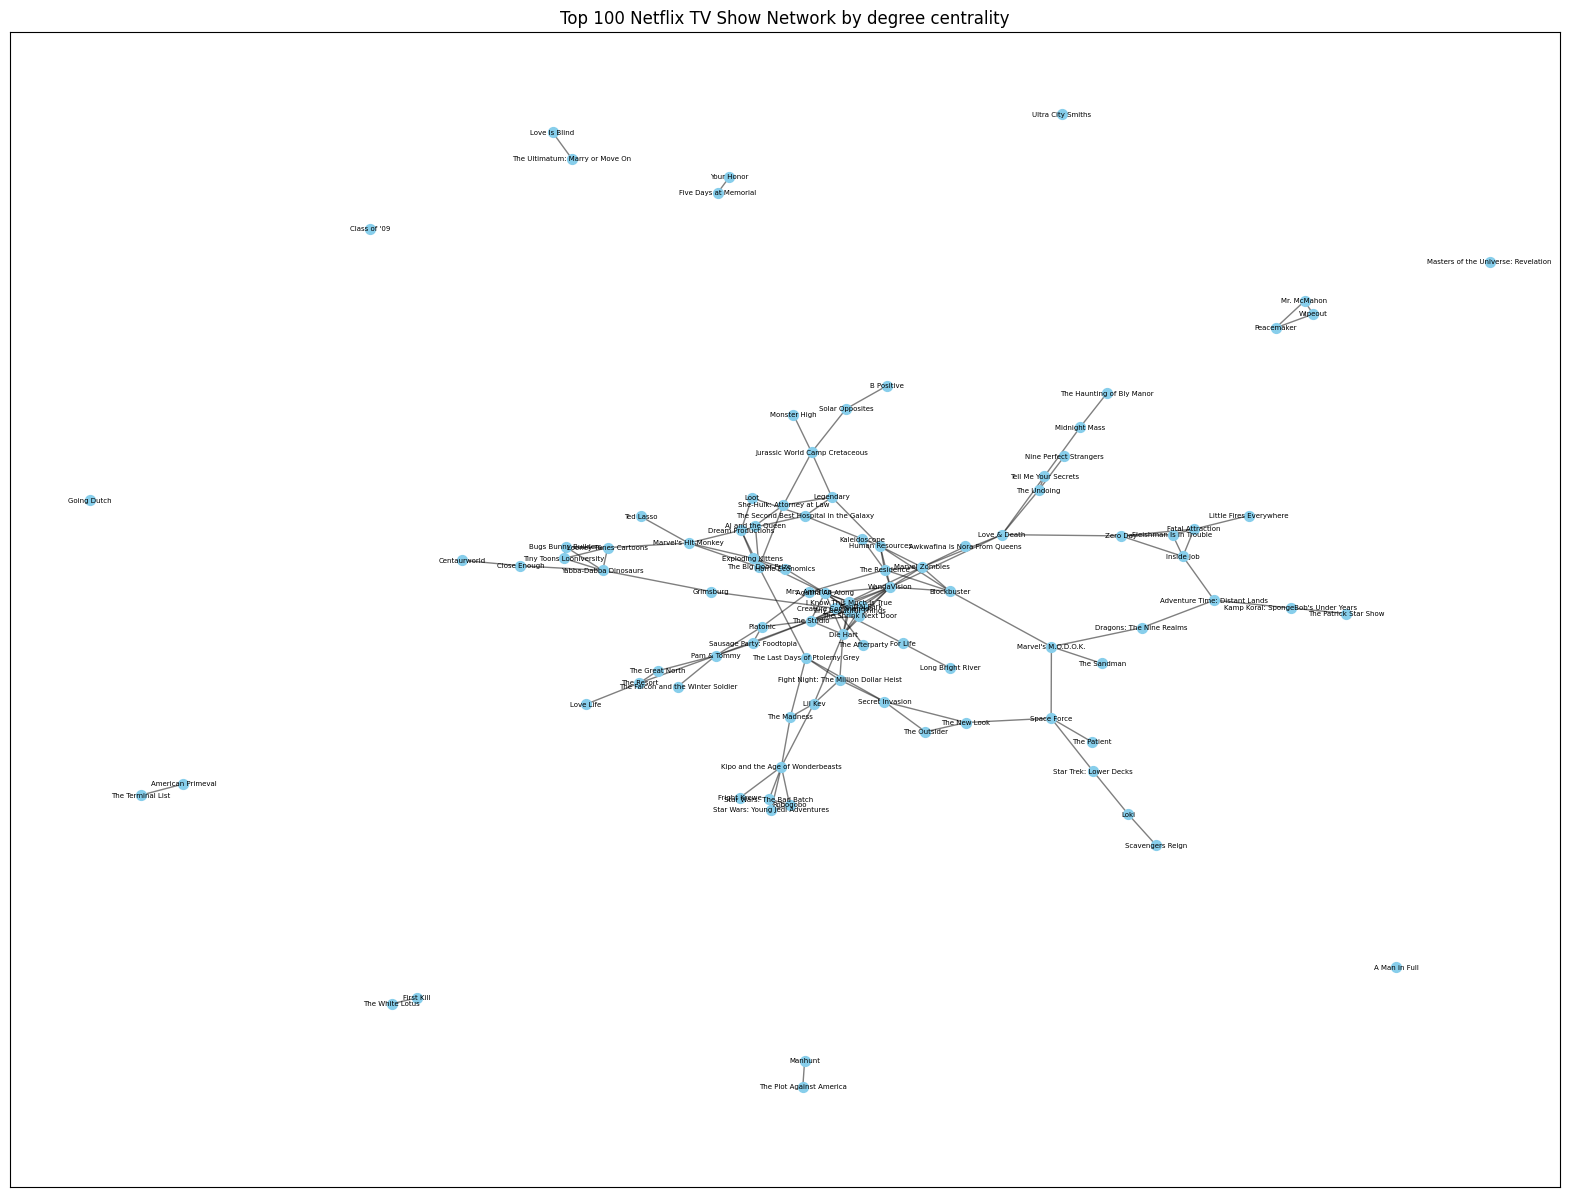

In [5]:
#Sort top 100 TV shows
top_100_shows = dict(sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:100])
top_100_graph = G.subgraph(top_100_shows.keys())

#Visualization
plt.figure(figsize=(20, 15))
node_sizes = [1000 * degree_centrality[node] for node in top_100_graph.nodes()]
pos = nx.spring_layout(top_100_graph, seed=42)
nx.draw_networkx_nodes(top_100_graph, pos, node_size=50, node_color="skyblue")
nx.draw_networkx_edges(top_100_graph, pos, alpha=0.5)
nx.draw_networkx_labels(top_100_graph, pos, font_size=5, font_color="black")

plt.title("Top 100 Netflix TV Show Network by degree centrality")
plt.show()

Top 10 TV Shows by Eigenvector Centrality:
WandaVision: 0.37141596261612675
The Studio: 0.3494858566794559
Agatha All Along: 0.3431000641713632
Die Hart: 0.3327386226015392
Tiny Beautiful Things: 0.32840180743888725
The Shrink Next Door: 0.32367127292275605
I Know This Much Is True: 0.3231134442973273
Central Park: 0.3179926850131761
Marvel Zombies: 0.10074593274808673
The Residence: 0.09674482391048077


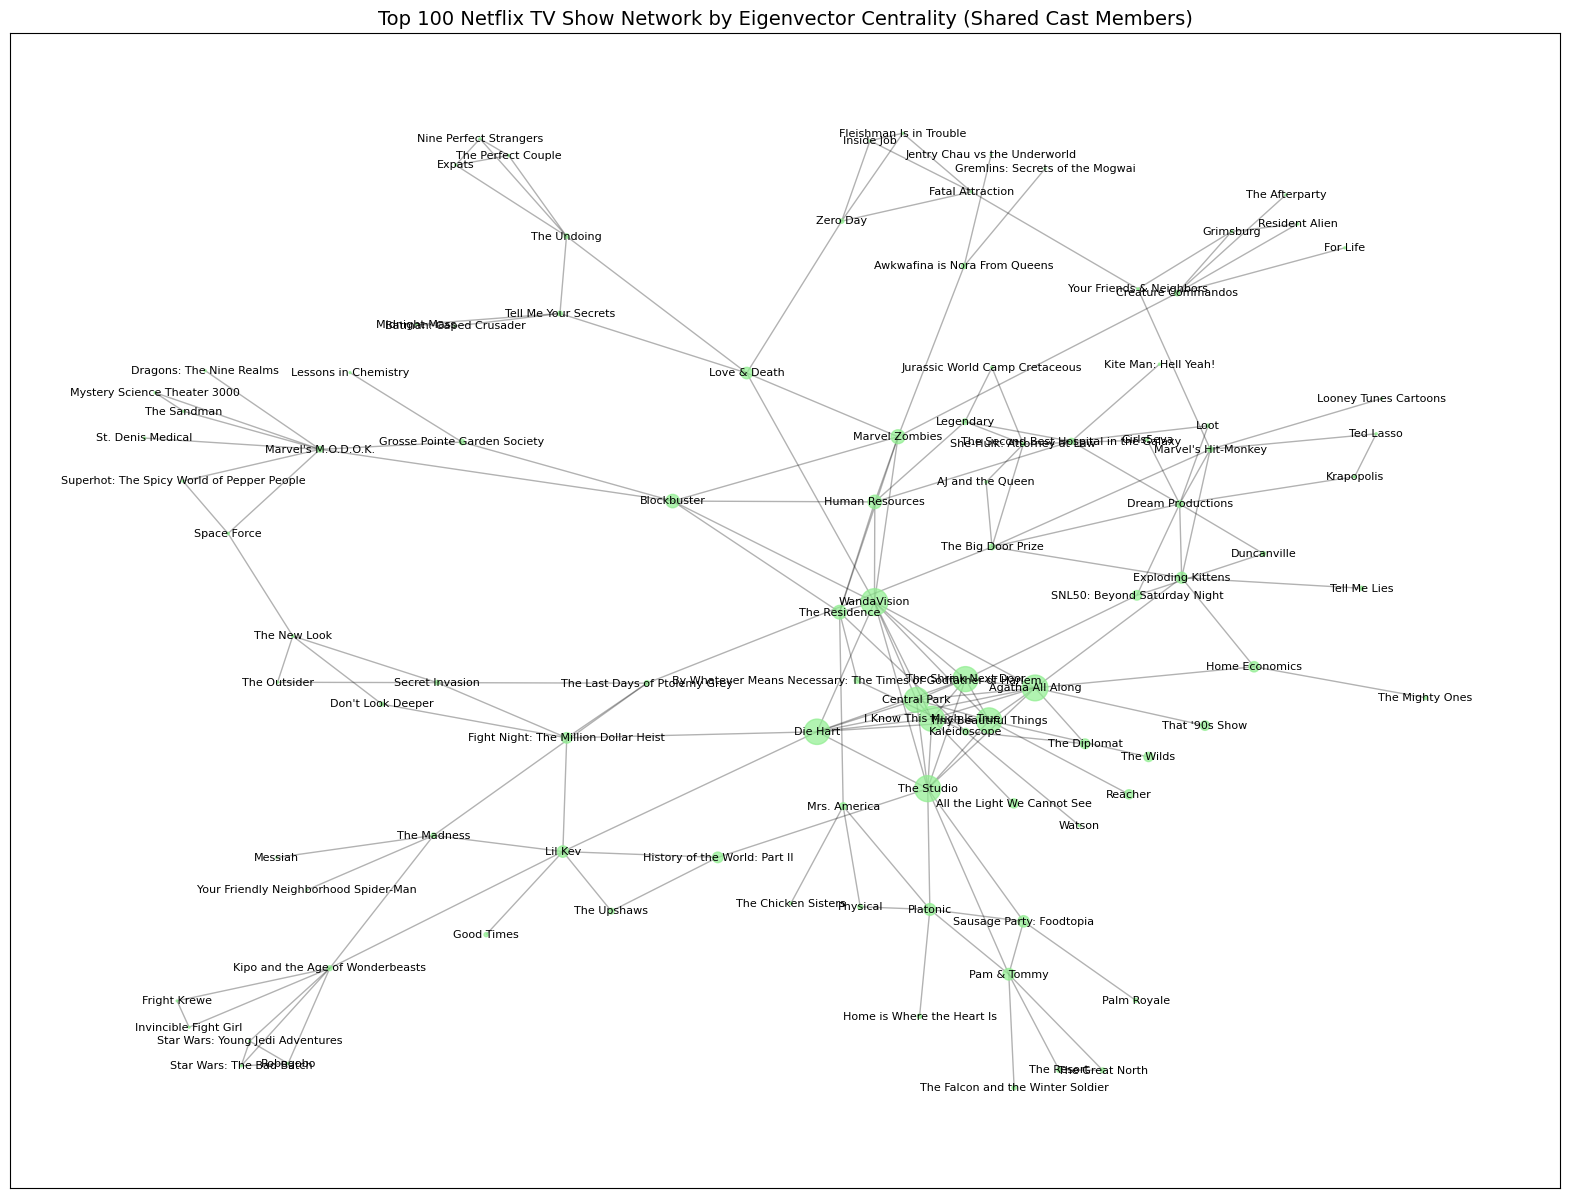

In [6]:
#Calculate eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(G)

#Sort top 10 TV shows
top_10_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 TV Shows by Eigenvector Centrality:")
for show, centrality in top_10_eigenvector:
    print(f"{show}: {centrality}")

#Sort top 100 TV shows
top_100_shows_eigenvector = dict(sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:100])
top_100_graph_eigenvector = G.subgraph(top_100_shows_eigenvector.keys())

#Visualization
plt.figure(figsize=(20, 15))
node_sizes_eigenvector = [1000 * eigenvector_centrality[node] for node in top_100_graph_eigenvector.nodes()]
pos = nx.spring_layout(top_100_graph_eigenvector, seed=42)
nx.draw_networkx_nodes(top_100_graph_eigenvector, pos, node_size=node_sizes_eigenvector, node_color="lightgreen", alpha=0.7)
nx.draw_networkx_edges(top_100_graph_eigenvector, pos, alpha=0.3)
nx.draw_networkx_labels(top_100_graph_eigenvector, pos, font_size=8, font_color="black")

plt.title("Top 100 Netflix TV Show Network by Eigenvector Centrality (Shared Cast Members)", fontsize=14)
plt.show()


Top 10 TV Shows by Closeness Centrality:
WandaVision: 0.07630839714253272
Marvel Zombies: 0.07399768864939185
The Studio: 0.07182280906697446
Blockbuster: 0.07088038270490782
Agatha All Along: 0.07073383470482875
Human Resources: 0.0704425491809928
Die Hart: 0.07020163759008653
Love & Death: 0.07010573371359734
The Residence: 0.06934783388966656
The Shrink Next Door: 0.06911433949946566


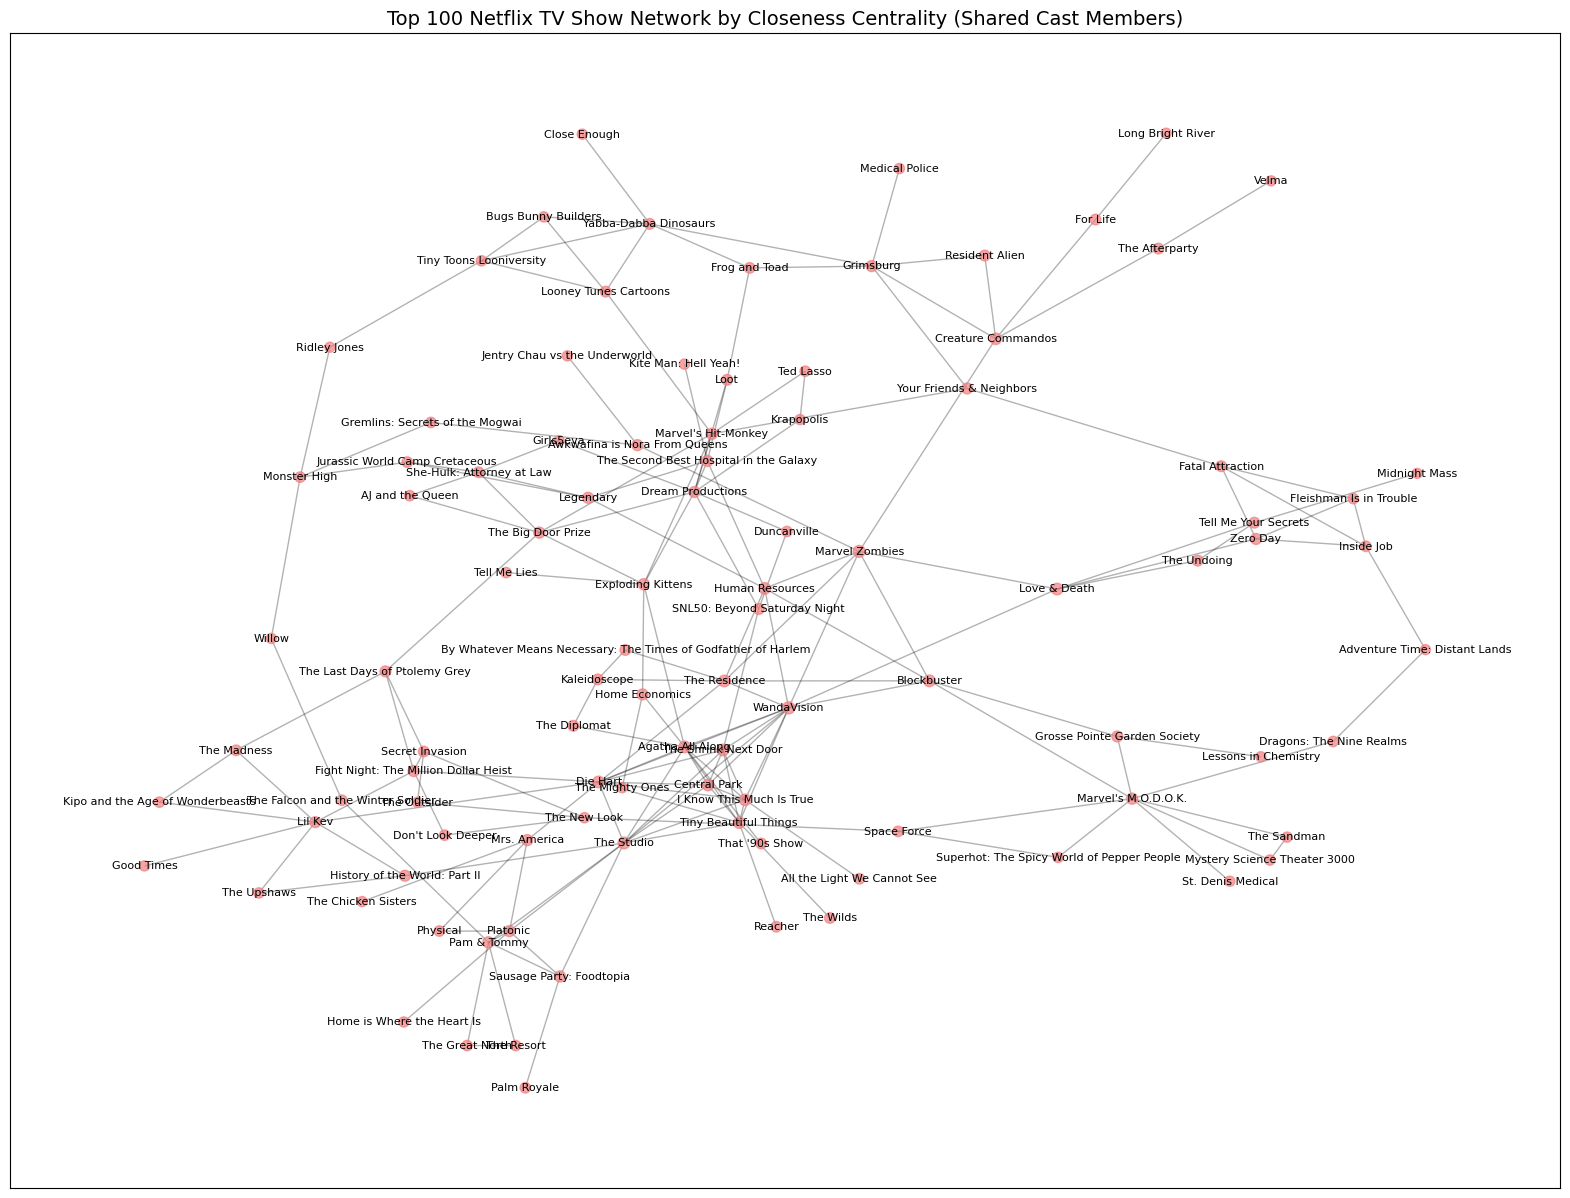

In [7]:
#Calculate closeness centrality
closeness_centrality = nx.closeness_centrality(G)

#Sort top 10 TV shows
top_10_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

print("Top 10 TV Shows by Closeness Centrality:")
for show, centrality in top_10_closeness:
    print(f"{show}: {centrality}")

#Sort top 100 TV shows
top_100_shows_closeness = dict(sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:100])

top_100_graph_closeness = G.subgraph(top_100_shows_closeness.keys())

#Visualization
plt.figure(figsize=(20, 15))

node_sizes_closeness = [1000 * closeness_centrality[node] for node in top_100_graph_closeness.nodes()]

pos = nx.spring_layout(top_100_graph_closeness, seed=42)
nx.draw_networkx_nodes(top_100_graph_closeness, pos, node_size=node_sizes_closeness, node_color="lightcoral", alpha=0.7)
nx.draw_networkx_edges(top_100_graph_closeness, pos, alpha=0.3)
nx.draw_networkx_labels(top_100_graph_closeness, pos, font_size=8, font_color="black")

plt.title("Top 100 Netflix TV Show Network by Closeness Centrality (Shared Cast Members)", fontsize=14)
plt.show()
